In [1]:
# import statsmodels
# import scipy

In [ ]:
# !pip install statsmodels

In [ ]:
# !pip install scipy

In [2]:
import numpy as np
import pandas as pd

# Descriptive Statistics
Statistik yang memberikan gambaran kondisi dan ringkasan data.

## Intro to Dataset: `Amazon Best Selling Book`
Dataset ``Amazon Best Selling Books`` adalah data publik dan legal. Anda dapat membaca deskripsi dan mengunduhnya di website [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Dataset ini berisi tentang 50 buku penjualan terbaik di Amazon dari tahun 2009 sampai tahun 2019. Data telah dikategorikan ke dalam buku fiksi dan non-fiksi menggunakan Goodreads.
<br>

In [7]:
df=pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Data Info: gambaran awal tentang dataset kita, untuk melihat kolom pada dataset, tipe data dan apakah ada data yg tidak lengkap.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Descritive Statistics Summary

In [9]:
df.describe()
# secara default menampilkan statistik descriptif data numerik; mean, median, quartile, standard deviasi

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
df.describe(include='object')
# untuk data string
# yang ditampilkan adalah ada berapa jenis kategori, kategori yang paling sering muncul dan jumlah kemunculannya

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


## Measure of Central Tendency
menggambarkan posisi sentral dari distribusi frekuensi untuk sekelompok data

### Mode
* nilai yang paling sering muncul dalam suatu data statistika/nilai dengan frekuensi paling tinggi  
* bisa lebih dari 1 nilai
* biasa dipakai untuk data qualitative

In [13]:
df['Price'].mode() # modus dari variable `Price` adalah 8

0    8
dtype: int64

In [15]:
df['Reviews'].mode() # modus dari variable `Reviews` adalah 8580

0    8580
dtype: int64

### Median
* nilai tengah dari data yang sudah diurutkan.
* biasa dipakai untuk data numerik yang memiliki distribusi data tidak normal
* tidak sensitif terhadap outlier

In [16]:
df['User Rating'].median()

4.7

In [18]:
df['User Rating'].describe()['50%']

4.7

### Mean
* rata-rata, total dari nilai data dibagi dengan jumlah observasi data.
* sensitif terrhadap outlier
* biasa dipakai untuk data numerik dengan distribusi normal

In [20]:
df['Price'].mean()

13.1

In [22]:
df['User Rating'].describe()['mean']

4.618363636363641

## Measure of Spread
menggambarkan seberapa tersebar data kita

### Range
* Selisih antara nilai maks dan nilai min
* sensitif terhadap outlier

In [23]:
df['Price'].max()-df['Price'].min()

105

### Standard deviasi
* Simpangan Baku: rata-rata absolut jarak penyimpangan titik-titik data diukur dari nilai rata-rata data tersebut
* akar kuadrat dari varians
* sensitif terhadap outlier
* biasa dipakai berpasangan dengan mean, untuk data numerik yang memiliki distiribusi normal

In [25]:
df['Price'].std()

10.84226197842238

### Quartile
* kuantil/persentile yang membagi data menjadi empat bagian dengan jumlah data yang kurang lebih sama
* Q1 25% datata paling bawah
* Q2 adakah median
* Q3 adalah 75% data dari bawah

In [26]:
df['Price'].describe()['25%'] #Q1

7.0

In [27]:
df['Price'].quantile(.25) #Q1

7.0

In [28]:
df['Price'].describe()['75%'] #Q3

16.0

In [29]:
df['Price'].quantile(.75) #Q3

16.0

### Interquartile Range (IQR)
* Jarak dari Q3 terhadap Q1
* IQR adalah ukuran variabilitas yang didasarkan pada pembagian kumpulan data menjadi kuartil
* Biasa dipakai dengan median pada data dengan distribusi tidak normal
* dipakai juga dalam penentuan outlier/pencilan/data ekstrim

In [31]:
q1=df['Price'].quantile(.25)
q3=df['Price'].quantile(.75)
iqr=q3-q1

iqr

9.0

## Normal Distribution
* Distribusi data numerik continuous yang berbentuk seperti bell pada histogram
* Simetris, dengan posisi mean, median dan modus pada titik yang sama
* banyak dipakai sebagai asumsi dalam uji hipotesis


### Assessing Normal Distribution by Graph

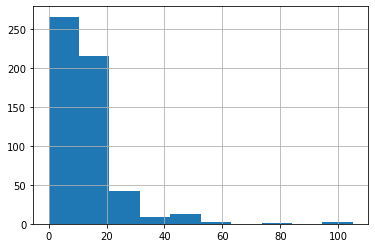

In [34]:
df['Price'].hist()\
# dengan histogram
# skew ke kanan

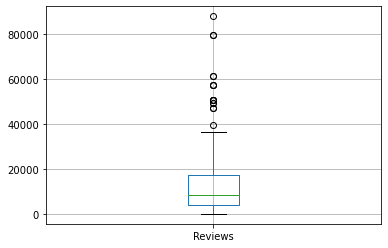

In [36]:
df.boxplot('Reviews')
# dengan boxplot

In [ ]:
# !pip install pylab

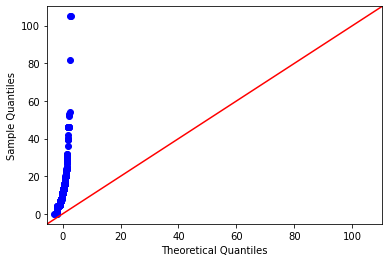

In [38]:
import statsmodels.api as sm
import pylab

sm.qqplot(df['Price'],line='45')
pylab.show()
# dengan QQplot
# tidak normal

### Frequentist Test
* yang dilihat adalah p-value
* **KHUSUS UNTUK UJI DISTRIBUSI**, apabila p-value <0.05, maka **ASUMSI DISTRIBUSI TIDAK NORMAL**


**Kolmogorov Smirnov**  
Membandingkan distribusi data kita dengan distribusi data hypothetical (dalam kasus kita distribusi normal)

In [40]:
from scipy.stats import kstest
kstest(df['User Rating'], 'norm')

KstestResult(statistic=0.9995165758576162, pvalue=0.0)

p-value <0.05 : asumsi distribusi tidak normal  
p-value >0.05: asumsi distribusi data normal

In [41]:
ks_stats,ks_pval=kstest(df['User Rating'],'norm')

if ks_pval<=0.05:
    print(f'P value: {ks_pval}, jadi asumsikan distribusi tidak normal')
else:
    print(f'P value: {ks_pval}, jadi asumsikan distribusi normal')

P value: 0.0, jadi asumsikan distribusi tidak normal


**Lilliefors**  
Pengembangan dari KS

In [47]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df['Reviews'], pvalmethod='table')
# stats, pval

(0.1789514349053149, 0.0009999999999998899)

In [48]:
lili_stats,lili_pval=lilliefors(df['Reviews'],pvalmethod='table')

if lili_pval<=0.05:
    print(f'P value: {lili_pval}, jadi asumsikan distribusi tidak normal')
else:
    print(f'P value: {lili_pval}, jadi asumsikan distribusi normal')

P value: 0.0, jadi asumsikan distribusi tidak normal


**Shapiro Wilk**  
* paling powerful (kemungkinan hasil uji salah lebih kecil) untuk data yang jumlahnya sedikit

In [49]:
from scipy.stats import shapiro
shapiro(df['Price'])

ShapiroResult(statistic=0.7021759748458862, pvalue=4.692623477522143e-30)

**D'Agustino and Pearson**  
* menguji berdasarkan skewness dan kurtosis dari distribusi data

In [51]:
from scipy.stats import normaltest
normaltest(df['Price'])

NormaltestResult(statistic=471.48999274374853, pvalue=4.142370491707519e-103)